## LEVEL 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('restaurants.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


## Task 1 : Top Cuisines

## Determine the top three most common cuisines in the dataset

In [3]:
cuisine_counts = df['Cuisines'].value_counts().head(3)

print(cuisine_counts)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


## Calculate the percentage of restaurants that serve each of the top cuisines.


In [5]:
total_restaurants = len(df)
top_cuisines_percentage = (cuisine_counts / total_restaurants) * 100

print(top_cuisines_percentage)

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


## Task 2 : City Analysis

## Identify the city with the highest number of restaurants in the dataset.


In [6]:
city_counts = df['City'].value_counts()

print("City with the highest number of restaurants:")
print(city_counts.index[0], "with", city_counts.values[0], "restaurants")

City with the highest number of restaurants:
New Delhi with 5473 restaurants


## Calculate the average rating for restaurants in each city.

In [7]:
city_color_ratings = df.groupby('City')['Rating color'].value_counts(normalize=True)

print("Proportion of color ratings for restaurants in each city:")
print(city_color_ratings)

Proportion of color ratings for restaurants in each city:
City            Rating color
Abu Dhabi       Green           0.600000
                Dark Green      0.350000
                Yellow          0.050000
Agra            Green           0.450000
                Yellow          0.450000
                                  ...   
Winchester Bay  Orange          1.000000
Yorkton         Orange          1.000000
��stanbul       Green           0.500000
                Dark Green      0.357143
                Yellow          0.142857
Name: proportion, Length: 347, dtype: float64


In [8]:
rating_mapping = {'Dark Green': 6, 'Green': 5, 'Yellow': 4, 'orange' : 3, 'white' : 2, 'red' : 1}  # example mapping

df['Rating color_num'] = df['Rating color'].map(rating_mapping)

city_color_ratings_num = df.groupby('City')['Rating color_num'].mean()

print("Average color ratings (numerical) for restaurants in each city:")
print(city_color_ratings_num)

Average color ratings (numerical) for restaurants in each city:
City
Abu Dhabi          5.300000
Agra               4.578947
Ahmedabad          4.904762
Albany             4.000000
Allahabad          4.000000
                     ...   
Weirton            4.000000
Wellington City    5.100000
Winchester Bay          NaN
Yorkton                 NaN
��stanbul          5.214286
Name: Rating color_num, Length: 141, dtype: float64


In [9]:
city_text_ratings = df.groupby('City')['Rating text'].value_counts(normalize=True)

print("Proportion of text ratings for restaurants in each city:")
print(city_text_ratings)

Proportion of text ratings for restaurants in each city:
City            Rating text
Abu Dhabi       Very Good      0.600000
                Excellent      0.350000
                Good           0.050000
Agra            Very Good      0.450000
                Good           0.450000
                                 ...   
Winchester Bay  Average        1.000000
Yorkton         Average        1.000000
��stanbul       Very Good      0.500000
                Excellent      0.357143
                Good           0.142857
Name: proportion, Length: 347, dtype: float64


In [10]:
rating_mapping = {'Good': 4, 'Very Good': 1, 'Average': 2, 'Excellent': 3, 'Not rated': 6, 'Poor': 5}  # example mapping

df['text_rating_num'] = df['Rating text'].map(rating_mapping)

city_text_ratings_num = df.groupby('City')['text_rating_num'].mean()

print("Average text ratings (numerical) for restaurants in each city:")
print(city_text_ratings_num)

Average text ratings (numerical) for restaurants in each city:
City
Abu Dhabi          1.850000
Agra               2.500000
Ahmedabad          2.000000
Albany             3.300000
Allahabad          2.500000
                     ...   
Weirton            4.000000
Wellington City    1.450000
Winchester Bay     2.000000
Yorkton            2.000000
��stanbul          2.142857
Name: text_rating_num, Length: 141, dtype: float64


In [11]:
# Group the data by 'City' and calculate the mean of 'Aggregate rating'
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Rename the 'Aggregate rating' column to 'Average Rating'
city_ratings = city_ratings.rename(columns={'Aggregate rating': 'Average Rating'})

# Print the results
print(city_ratings)

                City  Average Rating
0          Abu Dhabi        4.300000
1               Agra        3.965000
2          Ahmedabad        4.161905
3             Albany        3.555000
4          Allahabad        3.395000
..               ...             ...
136          Weirton        3.900000
137  Wellington City        4.250000
138   Winchester Bay        3.200000
139          Yorkton        3.300000
140        ��stanbul        4.292857

[141 rows x 2 columns]


In [12]:
city_ratings = city_ratings.sort_values('Average Rating', ascending=False)

## Determine the city with the highest average rating.

In [13]:
# Group the data by 'City' and calculate the mean of 'Aggregate rating'
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort the results in descending order by average rating
city_ratings = city_ratings.sort_values('Aggregate rating', ascending=False)

# Get the city with the highest average rating
top_city = city_ratings.iloc[0]

print(f"The city with the highest average rating is {top_city['City']} with an average rating of {top_city['Aggregate rating']:.2f}")

The city with the highest average rating is Inner City with an average rating of 4.90


## Task 3 : Price Range Distribution

## Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants..

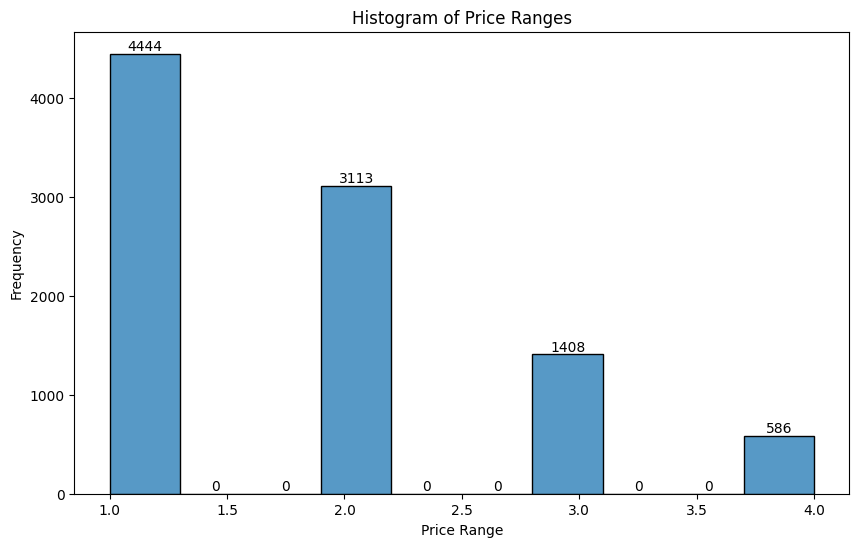

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price range'], bins=10, kde=False)
plt.title('Histogram of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom')
plt.show()

## Calculate the percentage of restaurants in each price range categoryy

In [15]:
total_restaurants = len(df)

price_range_counts = df['Price range'].value_counts()
price_range_percentages = (price_range_counts / total_restaurants) * 100

price_range_distribution = pd.DataFrame({'Price Range': price_range_counts.index, 
                                        'Count': price_range_counts.values, 
                                        'Percentage': price_range_percentages.values})

print(price_range_distribution)

   Price Range  Count  Percentage
0            1   4444   46.529159
1            2   3113   32.593446
2            3   1408   14.741912
3            4    586    6.135483


## Task 4 : Online Delivery

## Determine the percentage of restaurants that offer online delivery

In [16]:
total_restaurants = len(df)

online_delivery_yes = len(df[df['Has Online delivery'] == 'Yes'])

online_delivery_percentage = (online_delivery_yes / total_restaurants) * 100

print(f'Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%')

Percentage of restaurants that offer online delivery: 25.66%


## Compare the average ratings of restaurants with and without online delivery

In [17]:
online_delivery_avg_rating = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
no_online_delivery_avg_rating = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print(f'Average rating of restaurants with online delivery: {online_delivery_avg_rating:.2f}')
print(f'Average rating of restaurants without online delivery: {no_online_delivery_avg_rating:.2f}')

Average rating of restaurants with online delivery: 3.25
Average rating of restaurants without online delivery: 2.47
